In [1]:
import mlflow
import pandas as pd
from ultralytics import YOLO, settings
from roboflow import Roboflow
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rf = Roboflow(api_key="dh1IQQWaRMJr2hLveWqL")
project = rf.workspace("daniels-magonis-0pjzx").project("valorant-9ufcp")
version = project.version(3)
dataset = version.download("yolov11", "./datasets/")
settings.update({'mlflow': True})

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [7]:
dataset.name

'valorant'

In [3]:
ds = datasets.load_dataset("keremberke/valorant-object-detection", "full")
ds = ds['train'].to_pandas()
objects_df = pd.json_normalize(ds.objects) \
    .set_index(ds['image_id']) \
    .explode(['id', 'area', 'bbox', 'category'])

objects_df.rename(columns={'id': 'object_id'}, inplace=True)
ds = ds.drop(columns='objects').join(objects_df, how='inner')

<AxesSubplot: title={'center': 'Class Distribution'}, xlabel='category', ylabel='Count'>

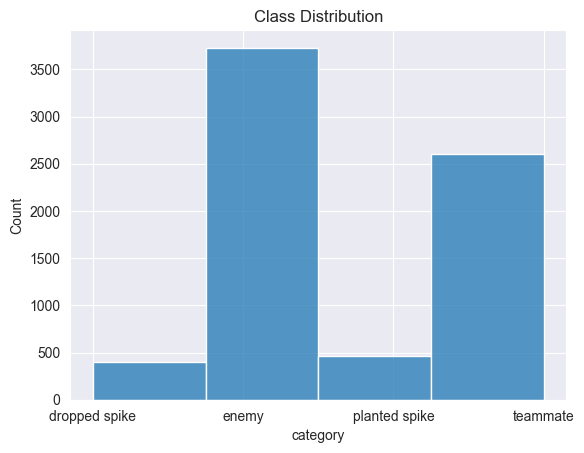

In [4]:
ds = ds.dropna()
plt.title('Class Distribution')
plt.xticks(range(4), ['dropped spike', 'enemy', 'planted spike', 'teammate'])
sns.histplot(ds['category'], bins=4)

In [5]:
ds.shape

(7184, 8)

<AxesSubplot: xlabel='area', ylabel='Count'>

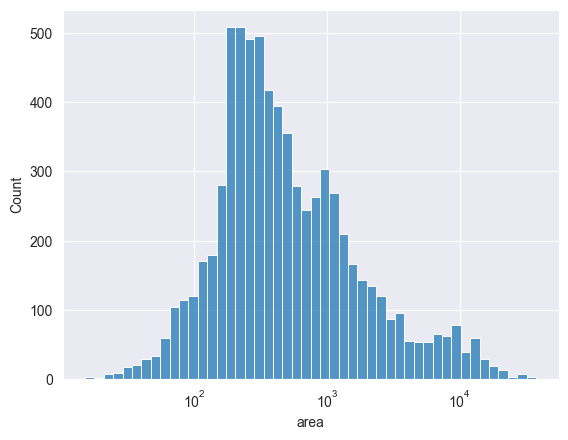

In [6]:
plt.xscale('log')
sns.histplot(ds['area'])

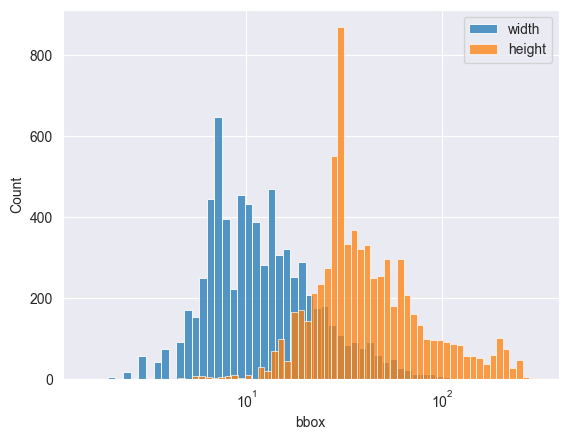

In [7]:
plt.xscale('log')
sns.histplot(ds['bbox'].apply(lambda x: x[2]))
sns.histplot(ds['bbox'].apply(lambda x: x[3]))
plt.legend(['width', 'height'])

<AxesSubplot: title={'center': 'aspect ratio'}, xlabel='bbox', ylabel='Count'>

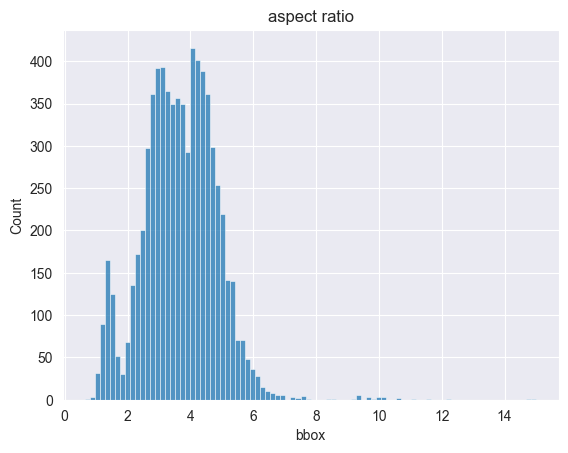

In [8]:
plt.title('aspect ratio')
sns.histplot(ds['bbox'].apply(lambda x: x[3] / x[2]))

In [2]:
model = YOLO('./main/models/yolo11n.pt')
model.train(data='./main/datasets/valorant-3/data.yaml', epochs=10, batch=16, imgsz=416, device=0, pretrained=True, project='YOLO experiment', name='training_n')

New https://pypi.org/project/ultralytics/8.3.36 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.34  Python-3.11.1 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
engine\trainer: task=detect, mode=train, model=./main/models/yolo11n.pt, data=E://YandexDisk/Notebooks/Mini-Streamio/main/datasets/valorant-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=YOLO experiment, name=training_n9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

train: Scanning E:\YandexDisk\Notebooks\Mini-Streamio\main\datasets\valorant-3\train\labels... 6927 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6927/6927 [00:15<00:00, 452.39it/s] 


train: New cache created: E:\YandexDisk\Notebooks\Mini-Streamio\main\datasets\valorant-3\train\labels.cache


val: Scanning E:\YandexDisk\Notebooks\Mini-Streamio\main\datasets\valorant-3\valid\labels... 1983 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1983/1983 [00:02<00:00, 739.10it/s] 


val: New cache created: E:\YandexDisk\Notebooks\Mini-Streamio\main\datasets\valorant-3\valid\labels.cache
Plotting labels to YOLO experiment\training_n9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(46ff2e03d233446b84c10f2f6110e1d3) to runs\mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs\mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO experiment\training_n9
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.16G      1.624      2.569      1.069         13        416: 100%|██████████| 433/433 [00:33<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:07<00:00,  8.47it/s]


                   all       1983       2072       0.81      0.688      0.781      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.24G      1.547      1.325      1.051         15        416: 100%|██████████| 433/433 [00:28<00:00, 15.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.05it/s]

                   all       1983       2072      0.924      0.767      0.847      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.23G      1.494      1.006      1.036         15        416: 100%|██████████| 433/433 [00:27<00:00, 15.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.08it/s]

                   all       1983       2072      0.848      0.835      0.891      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.21G      1.414     0.8808      1.007         15        416: 100%|██████████| 433/433 [00:27<00:00, 15.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.09it/s]

                   all       1983       2072      0.941      0.832      0.906      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.21G      1.351     0.7902     0.9835         16        416: 100%|██████████| 433/433 [00:27<00:00, 15.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:07<00:00,  8.80it/s]

                   all       1983       2072      0.945      0.866      0.923      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.22G       1.31     0.7339     0.9652         15        416: 100%|██████████| 433/433 [00:28<00:00, 15.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.07it/s]

                   all       1983       2072       0.96      0.907      0.947      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.22G      1.261     0.6814     0.9457         15        416: 100%|██████████| 433/433 [00:27<00:00, 15.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.17it/s]

                   all       1983       2072      0.961      0.915      0.949       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.21G      1.208     0.6506     0.9297         15        416: 100%|██████████| 433/433 [00:27<00:00, 15.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.31it/s]

                   all       1983       2072      0.959      0.921      0.956      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.21G      1.168     0.6122     0.9227         16        416: 100%|██████████| 433/433 [00:27<00:00, 15.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.03it/s]

                   all       1983       2072      0.957      0.931      0.958      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.22G      1.127     0.5822     0.9082         16        416: 100%|██████████| 433/433 [00:28<00:00, 15.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:06<00:00,  9.27it/s]

                   all       1983       2072      0.957      0.944      0.959      0.641



10 epochs completed in 0.105 hours.
Optimizer stripped from YOLO experiment\training_n9\weights\last.pt, 5.4MB
Optimizer stripped from YOLO experiment\training_n9\weights\best.pt, 5.4MB

Validating YOLO experiment\training_n9\weights\best.pt...
Ultralytics 8.3.34  Python-3.11.1 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8191MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:07<00:00,  8.09it/s]


                   all       1983       2072      0.957      0.931      0.958      0.643
         dropped spike        117        117      0.979      0.846      0.907      0.654
                 enemy       1042       1047      0.948       0.92      0.955      0.619
         planted spike        162        162      0.923      0.969      0.977      0.626
              teammate        746        746      0.979      0.989      0.994      0.675
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO experiment\training_n9
MLflow: results logged to runs\mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002078D5ACA50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [8]:
model.val(data='./main/datasets/valorant-3/data.yaml', batch=16, imgsz=416, device=0, name='evaluation')

Transferred 1009/1015 items from pretrained weights


Registered model 'yolo11l' already exists. Creating a new version of this model...
Created version '1' of model 'yolo11l'.


<ModelVersion: aliases=[], creation_timestamp=1732193661875, current_stage='None', description=None, last_updated_timestamp=1732193661875, name='yolo11l', run_id='fa057e449fcf4fc78ac220a92e6f4f48', run_link=None, source='file:///E:/YandexDisk/Notebooks/test_task/runs/mlflow/184463932476833991/fa057e449fcf4fc78ac220a92e6f4f48/artifacts', status='READY', status_message=None, tags={}, user_id=None, version=1>